<a href="https://colab.research.google.com/github/Riadhchibani/AI_PROJECT/blob/main/cardiovascularTRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cardiovascular Disease**
I am using a DATASET to run my first model until i recieve the orgin one

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


**Load and Describe Data**

In [2]:
dataF = pd.read_csv('/content/drive/MyDrive/cardio_train.csv', sep = ';')
dataF.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
dataF.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0




*   Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm)
* Weight | Objective Feature | weight | float (kg)
* Gender | Objective Feature | gender | categorical code
* Systolic blood pressure | Examination Feature | ap_hi | int
* Diastolic blood pressure | Examination Feature | ap_lo | int
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary



In [4]:
print(dataF.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [5]:
dataF.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


**Preprocess Data**

In [7]:
print(dataF.isnull().sum())

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


**Process data**

In [8]:
#change the age from days to years
dataF['age'] = (dataF['age'] / 365.25).astype(int)

In [9]:
dataF['age'].describe()

,age
count,70000.000000
mean,52.803257
std,6.762462
min,29.000000
25%,48.000000
50%,53.000000
75%,58.000000
max,64.000000


In [10]:
dataF['gender'] = dataF['gender'].replace({1: 0, 2: 1}) # 1->men, 0 -> women

In [11]:
dataF['gender'].describe()

,gender
count,70000.000000
mean,0.349571
std,0.476838
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [13]:
dataF.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,1,168,62.0,110,80,1,1,0,0,1,0
1,1,55,0,156,85.0,140,90,3,1,0,0,1,1
2,2,51,0,165,64.0,130,70,3,1,0,0,0,1
3,3,48,1,169,82.0,150,100,1,1,0,0,1,1
4,4,47,0,156,56.0,100,60,1,1,0,0,0,0


**change 2 columns with single value **

**Normalization**

In [14]:
dataF['BMI'] = dataF['weight'] / (dataF['height'] / 100) ** 2
dataF['BMI'].describe()

,BMI
count,70000.000000
mean,27.556513
std,6.091511
min,3.471784
25%,23.875115
50%,26.374068
75%,30.222222
max,298.666667


In [15]:
dataF['BMI'] = MinMaxScaler().fit_transform(dataF[['BMI']])

In [16]:
#dataF.drop(columns=['height', 'weight'], inpalce=True)
dataF = dataF.drop(columns=['height', 'weight'])

In [17]:
dataF.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,1,110,80,1,1,0,0,1,0,0.062655
1,1,55,0,140,90,3,1,0,0,1,1,0.106560
2,2,51,0,130,70,3,1,0,0,0,1,0.067874
3,3,48,1,150,100,1,1,0,0,1,1,0.085498
4,4,47,0,100,60,1,1,0,0,0,0,0.066192


In [18]:
dataF['MAP'] = dataF['ap_lo'] + (1/3)*( dataF['ap_hi'] - dataF['ap_lo'])
dataF.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,0,50,1,110,80,1,1,0,0,1,0,0.062655,90.000000
1,1,55,0,140,90,3,1,0,0,1,1,0.106560,106.666667
2,2,51,0,130,70,3,1,0,0,0,1,0.067874,90.000000
3,3,48,1,150,100,1,1,0,0,1,1,0.085498,116.666667
4,4,47,0,100,60,1,1,0,0,0,0,0.066192,73.333333


In [19]:
#dataF[['ap_hi','ap_lo']] = MinMaxScaler().fit_transform(dataF[['ap_hi', 'ap_lo']])
#dataF.head()

In [20]:
#dataF['blood_pressure'] = dataF['ap_hi'] + dataF['ap_lo']
#dataF.head()

In [21]:
#dataF['blood_pressure'].describe()

In [22]:
dataF.duplicated().sum()

np.int64(0)

In [23]:
dataF['MAP'] = MinMaxScaler().fit_transform(dataF[['MAP']])
dataF.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,0,50,1,110,80,1,1,0,0,1,0,0.062655,0.017693
1,1,55,0,140,90,3,1,0,0,1,1,0.106560,0.019933
2,2,51,0,130,70,3,1,0,0,0,1,0.067874,0.017693
3,3,48,1,150,100,1,1,0,0,1,1,0.085498,0.021277
4,4,47,0,100,60,1,1,0,0,0,0,0.066192,0.015454


In [24]:
dataF = dataF.drop(columns=['ap_hi', 'ap_lo'])
dataF.head()

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
0,0,50,1,1,1,0,0,1,0,0.062655,0.017693
1,1,55,0,3,1,0,0,1,1,0.106560,0.019933
2,2,51,0,3,1,0,0,0,1,0.067874,0.017693
3,3,48,1,1,1,0,0,1,1,0.085498,0.021277
4,4,47,0,1,1,0,0,0,0,0.066192,0.015454


In [25]:
dataF['gluc'].describe()

,gluc
count,70000.000000
mean,1.226457
std,0.572270
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


In [26]:
dataF['cholesterol'].unique()

array([1, 3, 2])

In [27]:
dataF = dataF.drop(columns=['id'])

In [28]:
dataF.describe()

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI,MAP
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.803257,0.349571,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,0.081589,0.020026
std,6.762462,0.476838,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,0.020636,0.018342
min,29.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.069118,0.018141
50%,53.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.077584,0.018141
75%,58.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.090620,0.019485
max,64.000000,1.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Exploratory Data Analysis EDA**

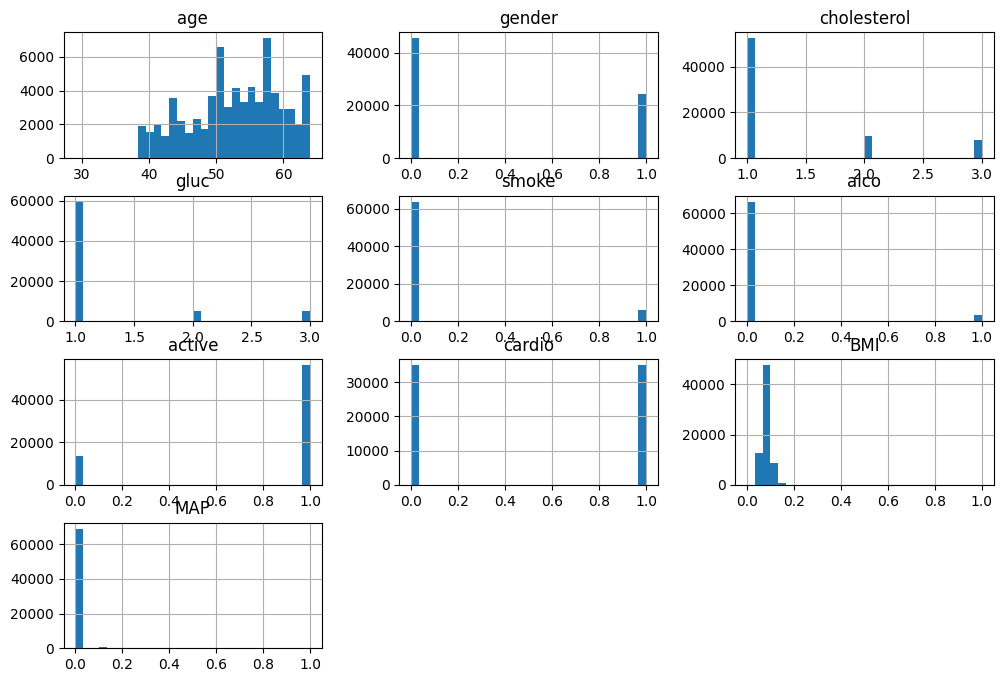

In [29]:
dataF.hist(figsize=(12, 8), bins=30)
plt.show()

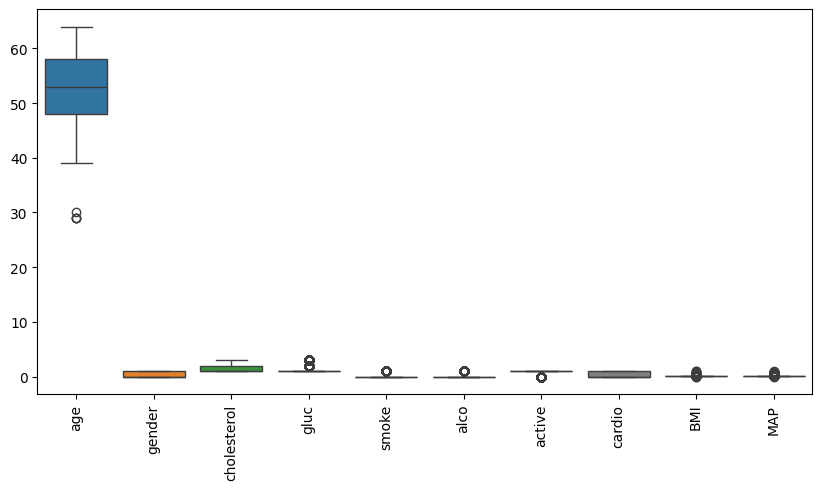

In [30]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=dataF)
plt.xticks(rotation=90)
plt.show()

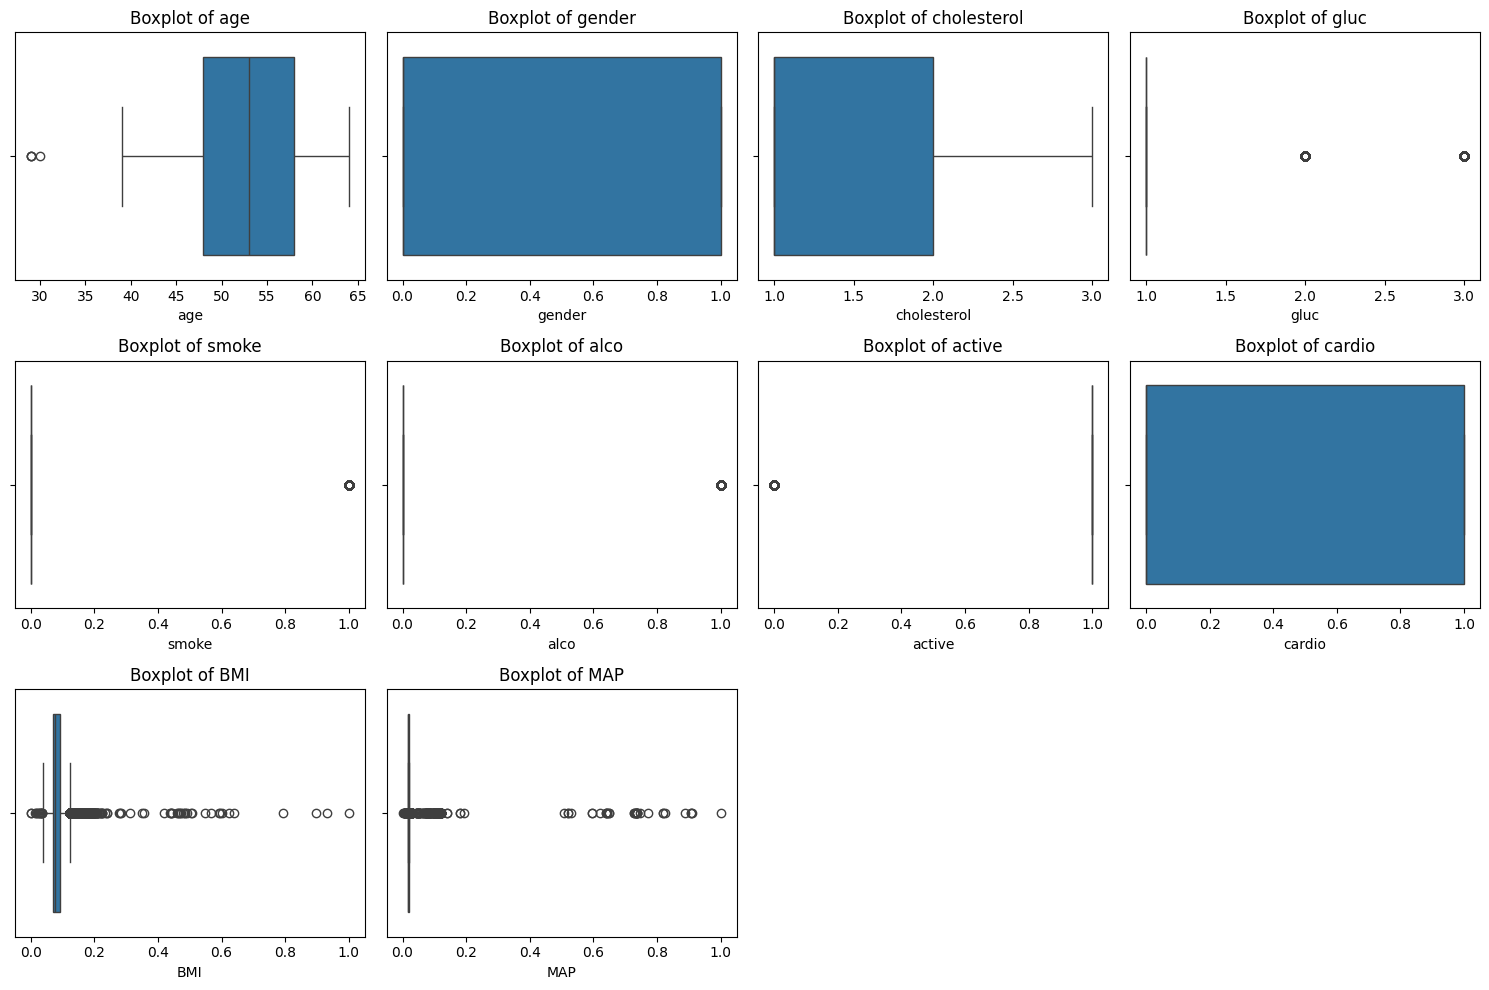

In [31]:
numerical_columns = ['age', 'gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI', 'MAP']

plt.figure(figsize=(15, 10))


for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns (adjust based on the number of attributes)
    sns.boxplot(data=dataF, x=col)
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [32]:
dataF['gender'].value_counts()

,count
gender,
0,45530
1,24470


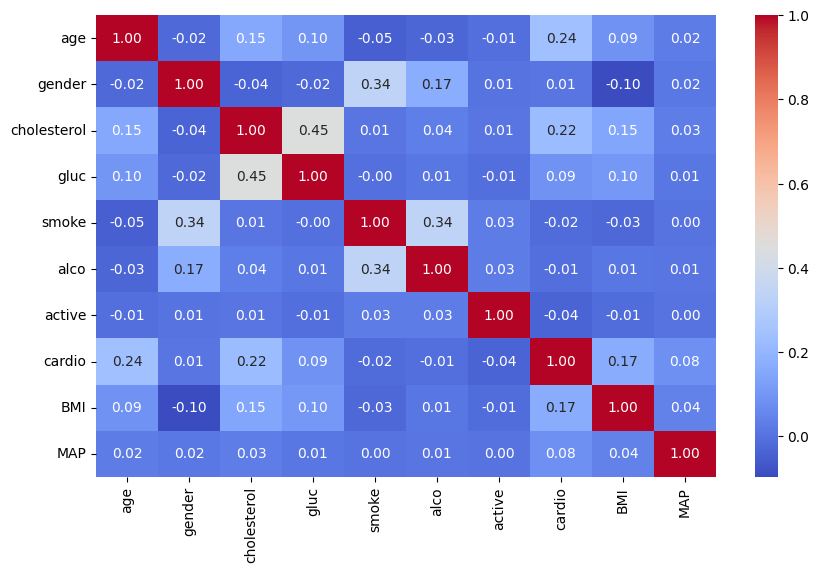

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(dataF.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Women**

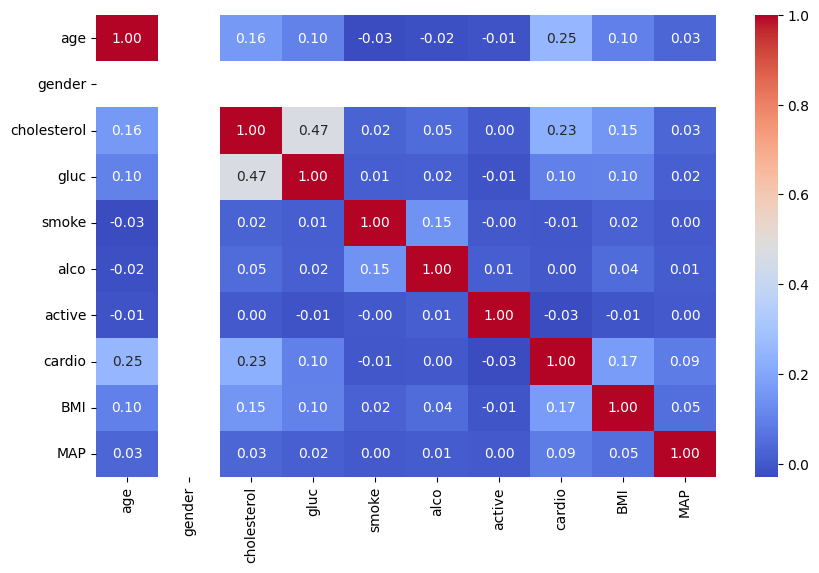

In [34]:
dataFWomen = dataF[dataF['gender'] == 0]
plt.figure(figsize=(10, 6))
sns.heatmap(dataFWomen.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**Men**

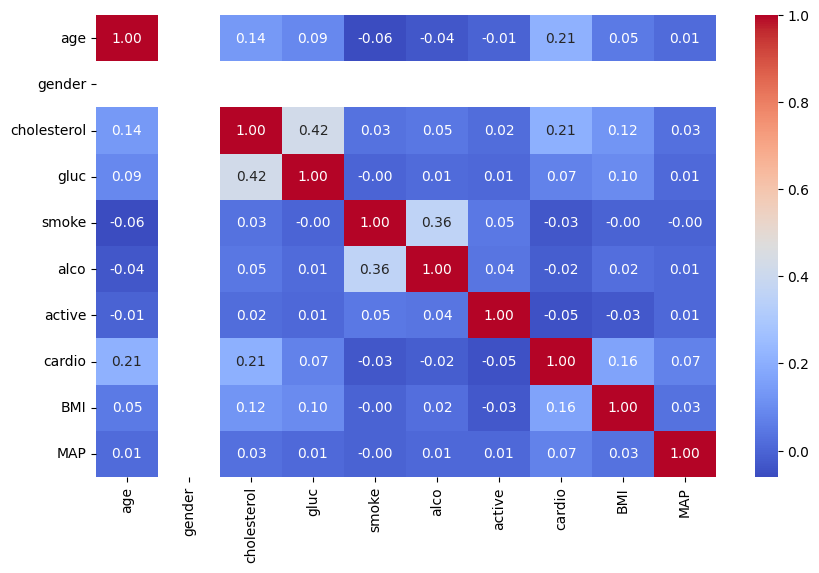

In [35]:
dataFWomen = dataF[dataF['gender'] == 1]
plt.figure(figsize=(10, 6))
sns.heatmap(dataFWomen.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

gender
0    45530
1    24470
Name: count, dtype: int64


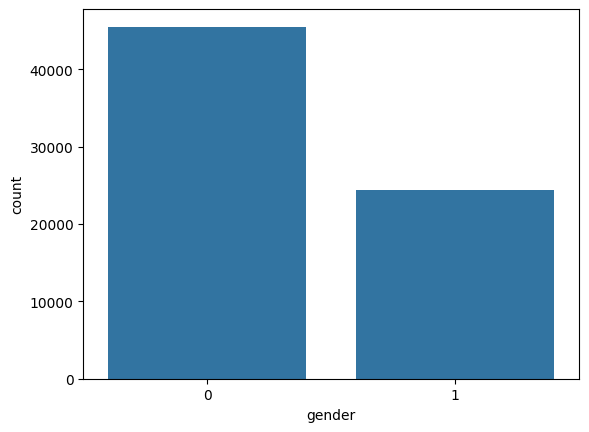

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64


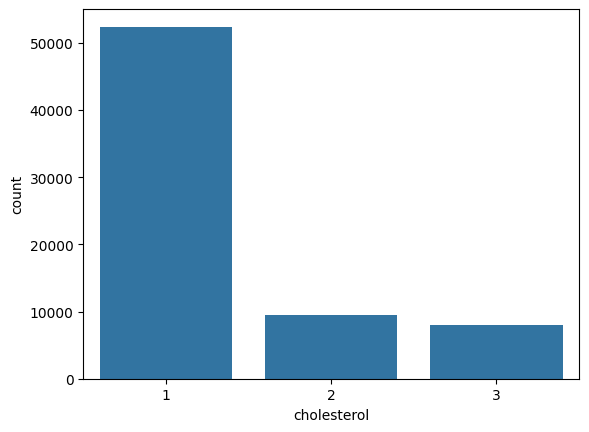

smoke
0    63831
1     6169
Name: count, dtype: int64


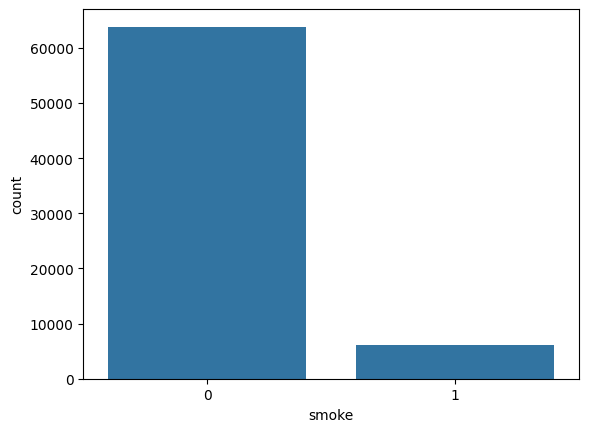

In [36]:
for col in ['gender', 'cholesterol', 'smoke']:
    print(dataF[col].value_counts())  # Show unique values and counts
    sns.countplot(x=dataF[col])
    plt.show()

<Figure size 1500x1500 with 0 Axes>

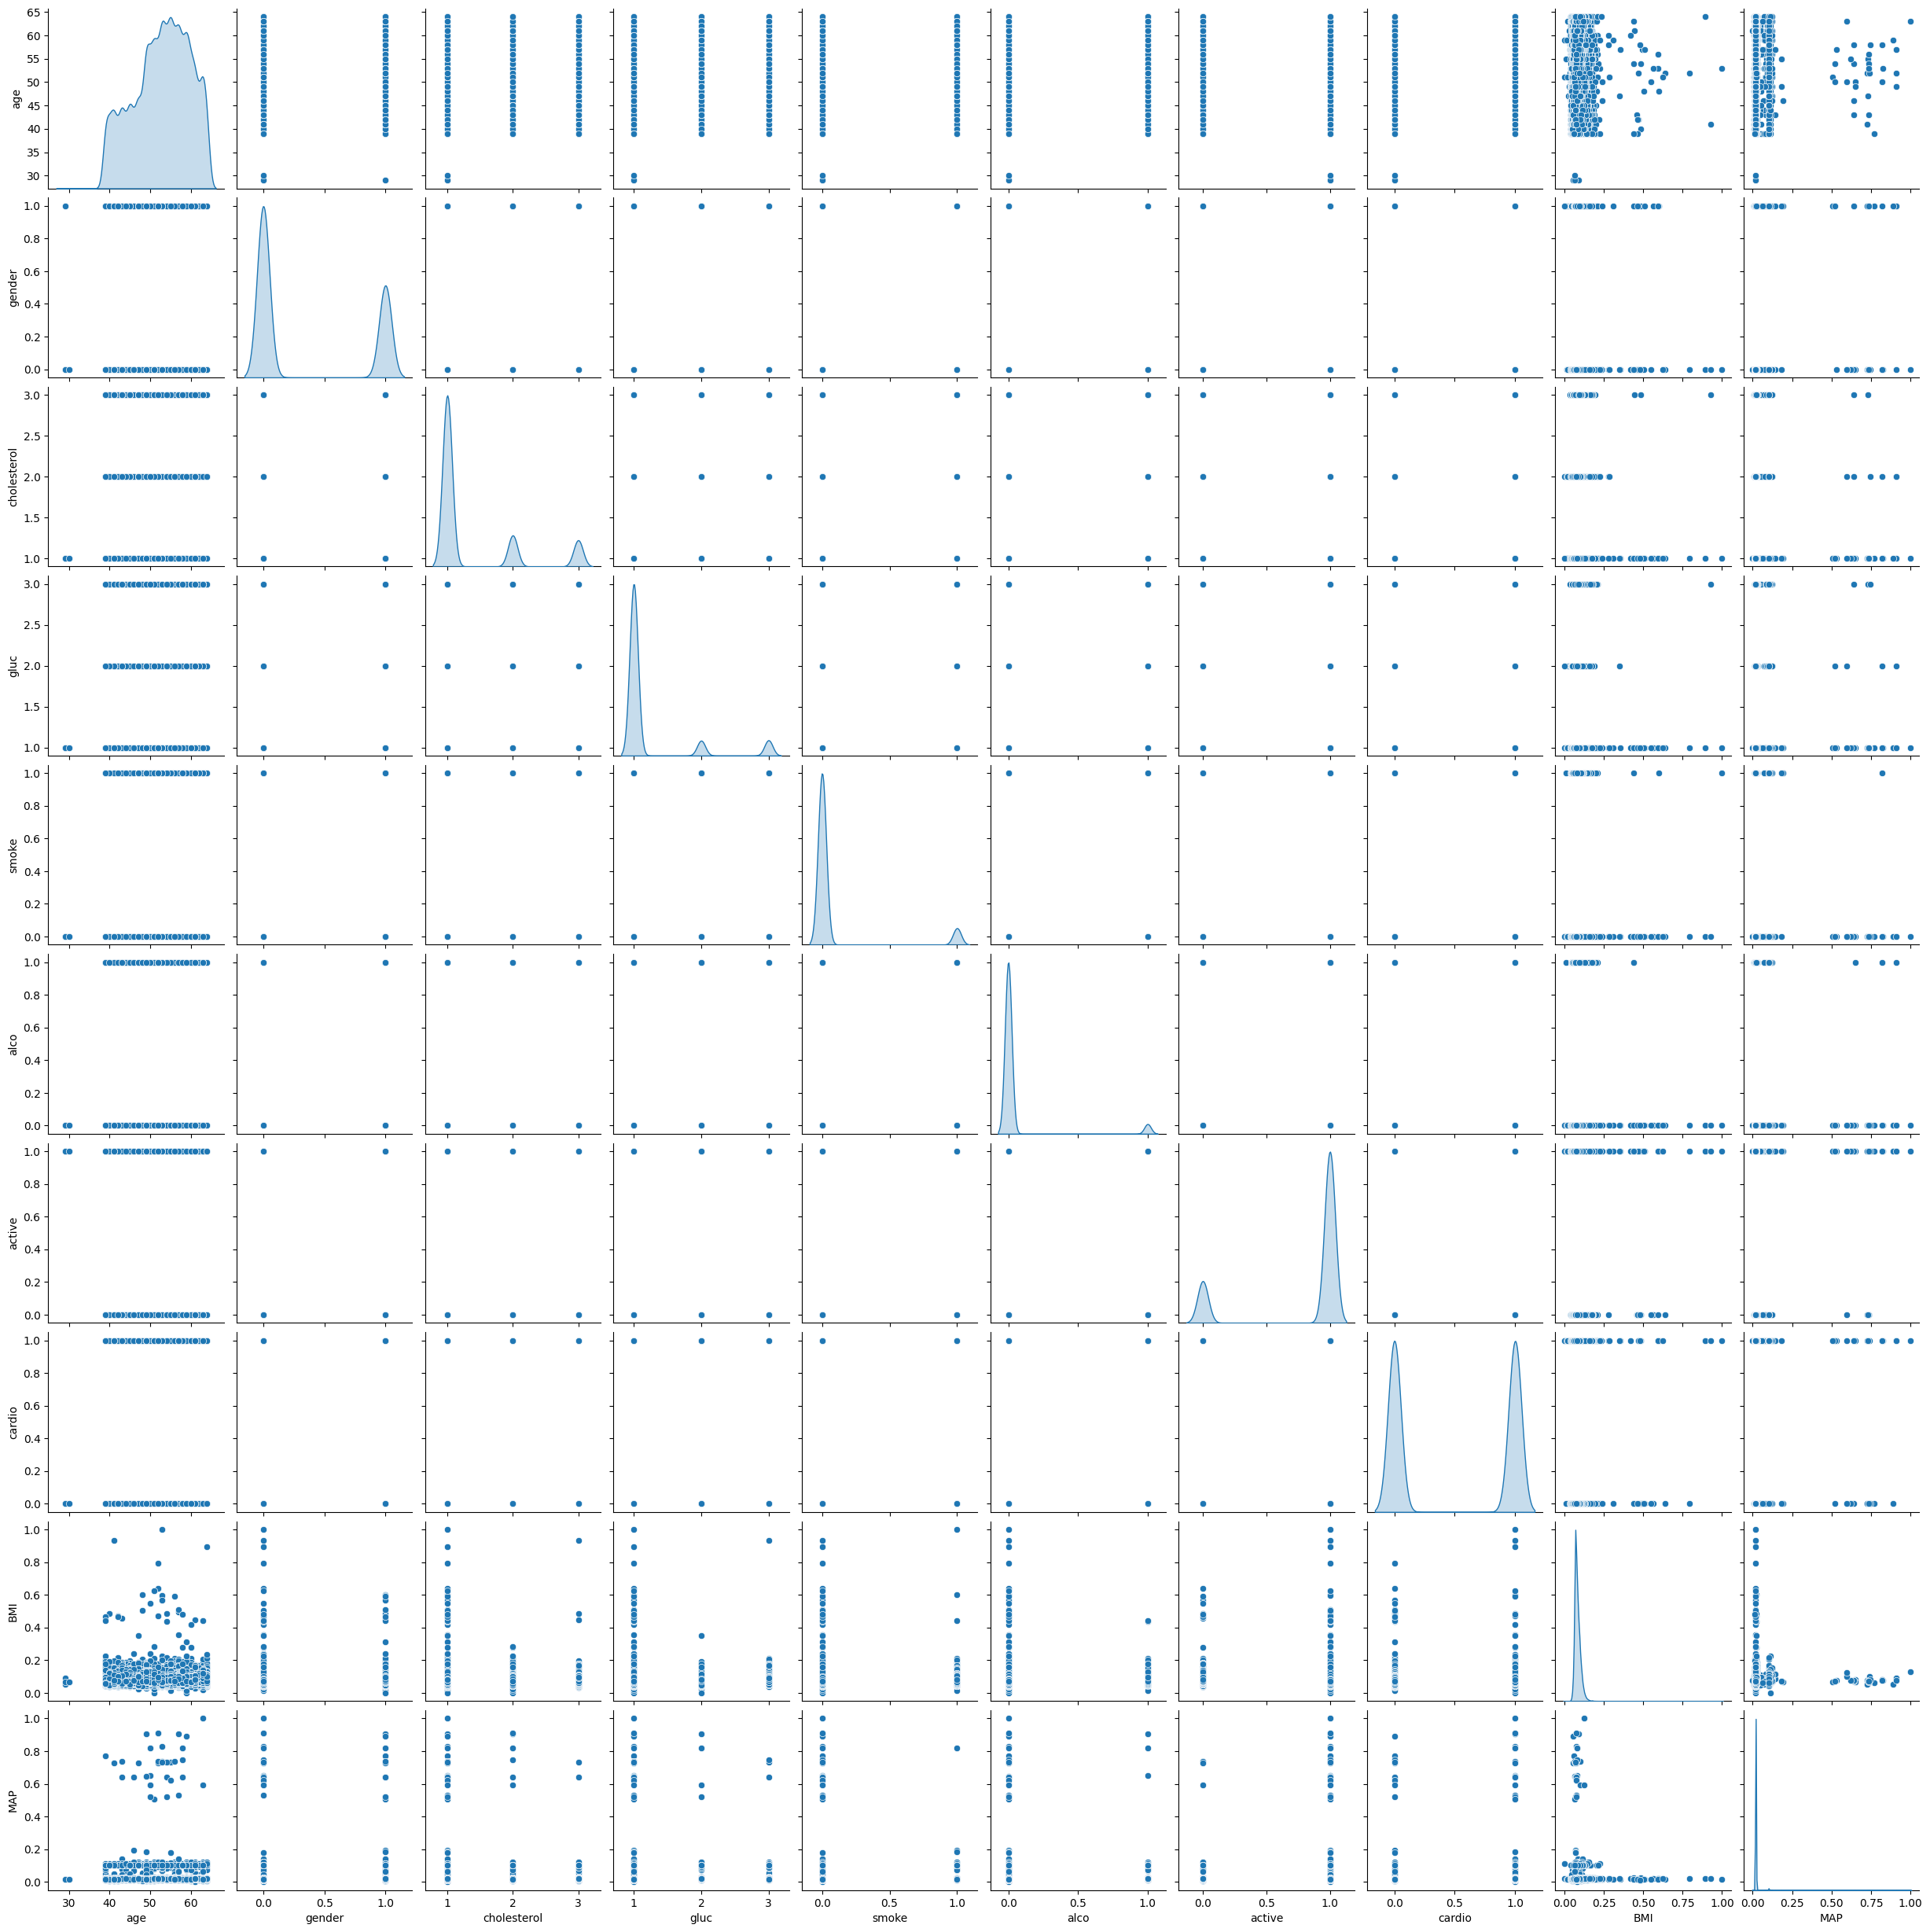

In [37]:
plt.figure(figsize=(15, 15))
sns.pairplot(dataF, diag_kind='kde')
plt.show()

**data have a data with good signe ✅**

In [38]:
dataF['cardio'].value_counts()

,count
cardio,
0,35021
1,34979


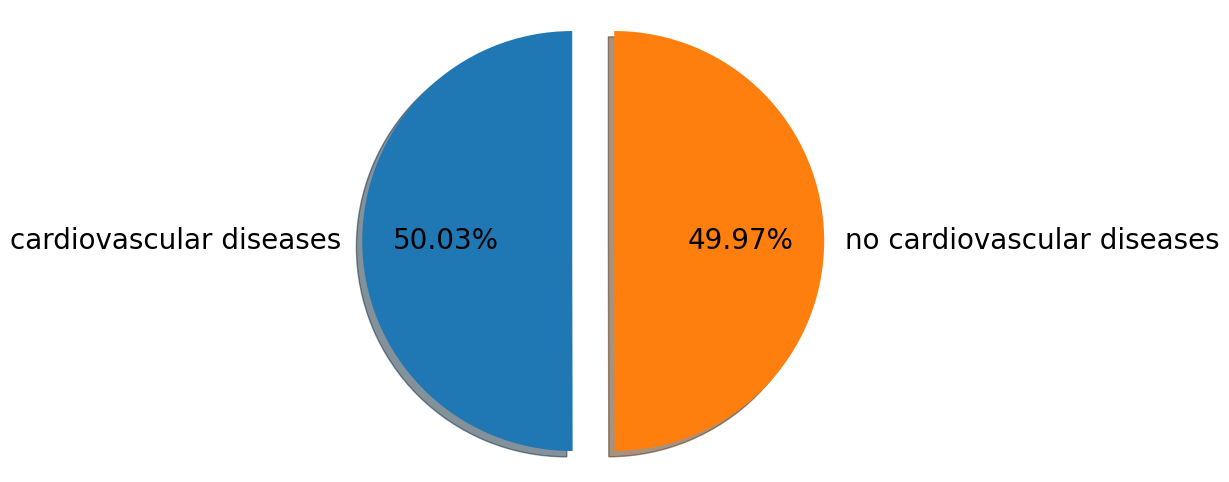

In [39]:
labels = ['cardiovascular diseases',  'no cardiovascular diseases']
myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(dataF['cardio'].value_counts(), autopct='%0.2f%%',
        shadow=True, startangle=90, explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = dataF.drop('cardio', axis=1)
y = dataF['cardio']
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
#logisticRegression function
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.6518571428571428
Precision: 0.6591527987897126
Recall: 0.6243909429635999
F1 Score: 0.641301148071828


In [47]:
best_score = 0
best_random_state = None

for state in range(1, 101):  # Testing values from 1 to 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    if acc > best_score:
        best_score = acc
        best_random_state = state  # Store the best performing random state

print(f"Best random_state: {best_random_state} with Accuracy: {best_score}")

Best random_state: 13 with Accuracy: 0.6518571428571428


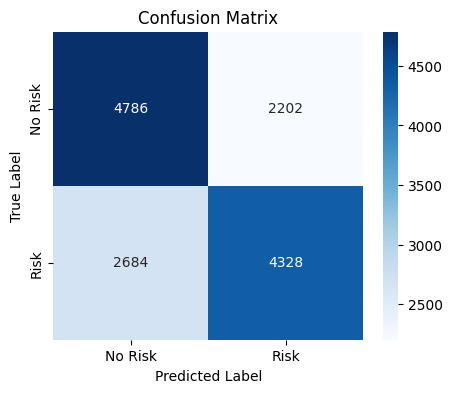

In [51]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)  # Compute confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(y_test, y_pred)

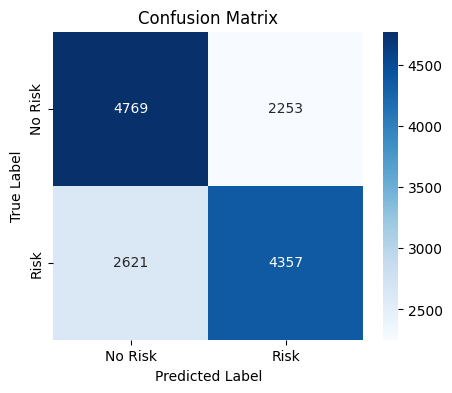

In [53]:
plot_confusion_matrix(y_test, y_pred)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

best_score = 0
best_random_state = None

# Try multiple random_state values
for state in range(1, 101):  # Testing values from 1 to 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    model = DecisionTreeClassifier(max_depth=5, random_state=state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    if acc > best_score:
        best_score = acc
        best_random_state = state  # Store the best performing random state

print(f"Best random_state: {best_random_state} with Accuracy: {best_score}")

Best random_state: 85 with Accuracy: 0.7369285714285714


Accuracy: 0.7369285714285714

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      7032
           1       0.75      0.71      0.73      6968

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



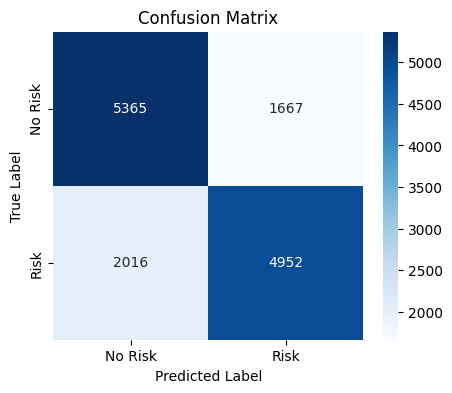

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1️⃣ Prepare Data
X = dataF.drop(columns=['cardio'])  # Features
y = dataF['cardio']  # Target

# 2️⃣ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=85)

# 3️⃣ Train Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# 4️⃣ Make Predictions
y_pred = model.predict(X_test)

# 5️⃣ Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


plot_confusion_matrix(y_test, y_pred)

In [56]:
from sklearn.ensemble import RandomForestClassifier

best_score = 0
best_random_state = None

# Try multiple random_state values
for state in range(1, 101):  # Testing values from 1 to 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    if acc > best_score:
        best_score = acc
        best_random_state = state  # Store the best performing random state

print(f"Best random_state: {best_random_state} with Accuracy: {best_score}")

Best random_state: 20 with Accuracy: 0.7367857142857143


Accuracy: 0.7367857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      7049
           1       0.77      0.67      0.72      6951

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000

Accuracy: 0.7367857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      7049
           1       0.77      0.67      0.72      6951

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



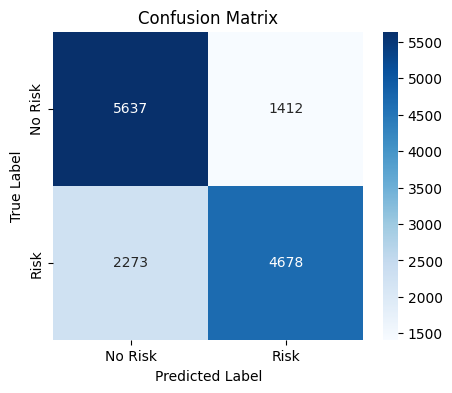

In [58]:
# Use the best random_state found
best_state = best_random_state  # Replace with the best value found above

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_state)

# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=best_state)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plot_confusion_matrix(y_test, y_pred)

In [59]:
pip install xgboost

In [62]:
import xgboost as xgb

best_score = 0
best_random_state = None

# Try multiple random_state values
for state in range(1, 101):  # Testing values from 1 to 100
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=state)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    if acc > best_score:
        best_score = acc
        best_random_state = state  # Store the best performing random state

print(f"Best random_state: {best_random_state} with Accuracy: {best_score}")

Best random_state: 85 with Accuracy: 0.7357857142857143


Accuracy: 0.7357857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.76      0.74      7032
           1       0.74      0.71      0.73      6968

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



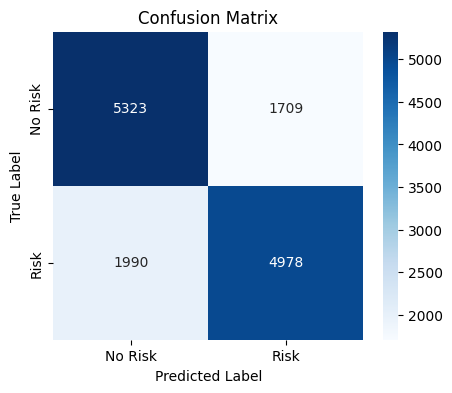

In [63]:
# Use the best random_state found above
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state)

# Train XGBoost Classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=best_random_state)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# 3️⃣ Evaluate Model Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


plot_confusion_matrix(y_test, y_pred)